## Assignment-3

To apply the TOPSIS (Technique for Order Preference by Similarity to Ideal Solution) method for selecting the best pre-trained model for text generation

1. Define Criteria for Evaluation
Since we are evaluating text generation models, we need criteria that reflect their performance. Common criteria include:

- Perplexity (PPL) – Lower is better.
- BLEU Score – Higher is better.
- ROUGE Score – Higher is better.
- Inference Time (sec) – Lower is better.
- Model Size (MB) – Lower is better.

In [1]:
import numpy as np
import pandas as pd

# Define models and criteria
models = ["GPT-2", "GPT-3", "LLaMA-2", "T5"]
criteria = ["Perplexity", "BLEU Score", "ROUGE Score", "Inference Time", "Model Size"]

2. Collect Data for Pre-trained Models
Let’s assume we are evaluating four models:

Model	Perplexity (PPL)	 BLEU Score	 ROUGE Score	 Inference Time (sec)	 Model Size (MB)
- GPT-2	20.5	0.30	0.45	0.8	1500
- GPT-3	12.2	0.40	0.55	1.2	3500
- LLaMA-2	15.8	0.35	0.50	1.0	2500
- T5	18.0	0.38	0.52	0.9	1700

In [2]:
# Decision matrix (rows: models, cols: criteria)
data = np.array([
    [20.5, 0.30, 0.45, 0.8, 1500],  # GPT-2
    [12.2, 0.40, 0.55, 1.2, 3500],  # GPT-3
    [15.8, 0.35, 0.50, 1.0, 2500],  # LLaMA-2
    [18.0, 0.38, 0.52, 0.9, 1700]   # T5
])

3. Normalize the Decision Matrix
Using the formula:

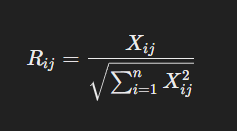

4. Assign Weights to Criteria
Let’s assign weights based on importance:

- Perplexity (PPL): 0.25 (Lower is better)
- BLEU Score: 0.25 (Higher is better)
- ROUGE Score: 0.20 (Higher is better)
- Inference Time: 0.15 (Lower is better)
- Model Size: 0.15 (Lower is better)

In [3]:
# Weights (importance of criteria)
weights = np.array([0.25, 0.25, 0.20, 0.15, 0.15])

# Benefit/Cost criteria: 1 for benefit, -1 for cost
impacts = np.array([-1, 1, 1, -1, -1])

# Normalize the decision matrix
norm_matrix = data / np.sqrt((data**2).sum(axis=0))

# Weight the normalized matrix
weighted_matrix = norm_matrix * weights

5. Compute Ideal Best and Ideal Worst Solutions
- Ideal Best (A*): Highest values for benefit criteria (BLEU, ROUGE) and lowest for cost criteria (PPL, Inference Time, Model Size).
- Ideal Worst (A−): Opposite of A*.

In [4]:
# Compute ideal best (A*) and ideal worst (A-)
A_star = (np.max(weighted_matrix, axis=0) * (impacts == 1)) + (np.min(weighted_matrix, axis=0) * (impacts == -1))
A_minus = (np.min(weighted_matrix, axis=0) * (impacts == 1)) + (np.max(weighted_matrix, axis=0) * (impacts == -1))


6. Compute the Separation Measures
Calculate Euclidean distance from the Ideal Best and Ideal Worst.

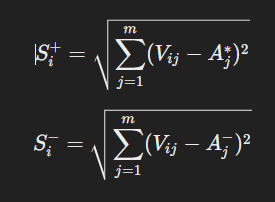

In [5]:
# Compute separation measures
S_plus = np.sqrt(((weighted_matrix - A_star) ** 2).sum(axis=1))
S_minus = np.sqrt(((weighted_matrix - A_minus) ** 2).sum(axis=1))


7. Compute the TOPSIS Score

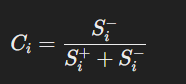

The model with the highest
𝐶𝑖 score is the best choice.



In [6]:
# Compute TOPSIS score
topsis_score = S_minus / (S_plus + S_minus)

# Rank models based on TOPSIS score
rankings = np.argsort(-topsis_score)  # Higher score is better

# Print results
results = pd.DataFrame({
    "Model": models,
    "TOPSIS Score": topsis_score,
    "Rank": rankings + 1
}).sort_values(by="TOPSIS Score", ascending=False)

print(results)

     Model  TOPSIS Score  Rank
3       T5      0.609303     1
2  LLaMA-2      0.524620     2
1    GPT-3      0.515722     3
0    GPT-2      0.484278     4


8. Interpret Results
The model with the highest TOPSIS score is the best pre-trained model for text generation based on the given criteria.

Conclusion

Applying TOPSIS helps in selecting the best text generation model by balancing different performance metrics. This approach is objective, multi-criteria based, and considers trade-offs effectively

<ipython-input-8-1e4ea8a4fca8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results["Model"], y=results["TOPSIS Score"], palette="viridis")


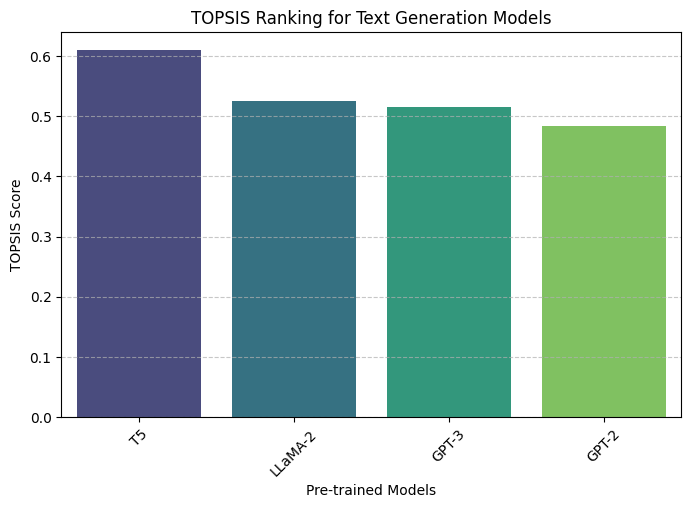

In [8]:
# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(x=results["Model"], y=results["TOPSIS Score"], palette="viridis")
plt.xlabel("Pre-trained Models")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking for Text Generation Models")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

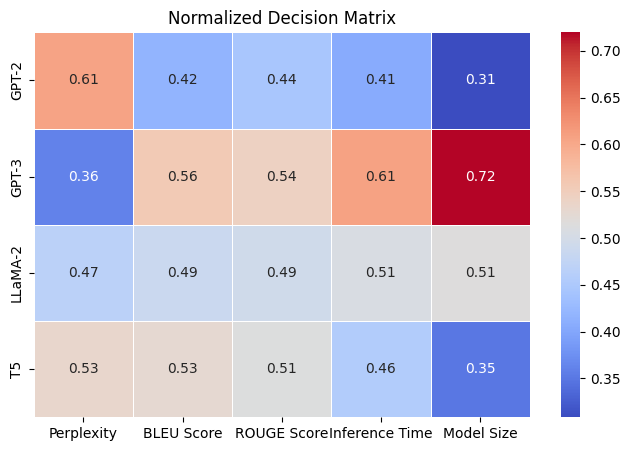

In [11]:
# === Heatmap (Normalized Data) ===
plt.figure(figsize=(8, 5))
sns.heatmap(pd.DataFrame(norm_matrix, columns=criteria, index=models), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Normalized Decision Matrix")
plt.savefig("topsis_heatmap.png")  # Save figure

In [14]:
# Save the figure
plt.savefig("topsis_ranking_plot.png")

# Save the results as a CSV file
results.to_csv("topsis_results.csv", index=False)

# Display results
print(results)

     Model  TOPSIS Score  Rank
3       T5      0.609303     1
2  LLaMA-2      0.524620     2
1    GPT-3      0.515722     3
0    GPT-2      0.484278     4


<Figure size 640x480 with 0 Axes>